#### Lab Assignment for A-3
##### By Najeeb Fariduddin Saiyed
##### PRN - 21070126057
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid yellow">

*Tasks*
1. Sampling and Quantization
2. Image Enhancement using Point Processing
3. Image Enhancement using Mask Processing
4. Image Segmentation using Slit and Merge
5. Image Segmentation using Thresholding
6. Image Segmentation using Region growing

<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px red">

<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">
1. Sampling And Quantization

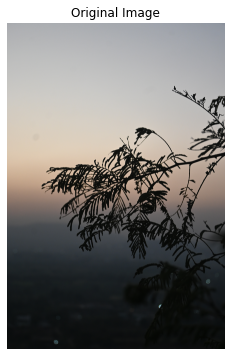

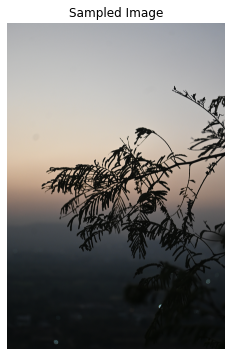

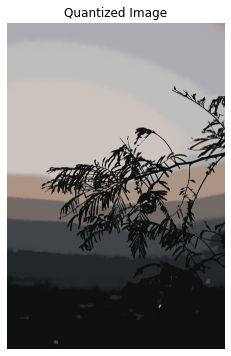

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\Najeeb\Desktop\dslr\DSC_5336.JPG")

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Sampling: Reduce the resolution of the image
scale_percent = 100  # adjust this value for desired sampling rate
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)

# Resize the image
sampled_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

# Display the sampled image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(sampled_image, cv2.COLOR_BGR2RGB))
plt.title('Sampled Image')
plt.axis('off')
plt.show()

# Quantization: Reduce the number of colors in the image
quantization_colors = 8  # adjust this value for desired number of colors
Z = sampled_image.reshape((-1, 3))

# Convert to np.float32
Z = np.float32(Z)

# Define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = quantization_colors
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((sampled_image.shape))

# Display the quantized image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('Quantized Image')
plt.axis('off')
plt.show()


sampling to reduce the resolution of the image. Sampling is done by resizing the image to a smaller size using OpenCV's resize function. We specify the percentage of reduction in resolution using the scale_percent variable.

Next, we perform quantization to reduce the number of colors in the sampled image. Quantization is done using the k-means clustering algorithm from OpenCV (cv2.kmeans). We reshape the image to a 2D array of pixels and apply k-means clustering to find 'K' cluster centers. The cluster centers represent the reduced set of colors. Then, we assign each pixel to its nearest cluster center and create a quantized image.

<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">
2. Image Enhancement using Point Processing

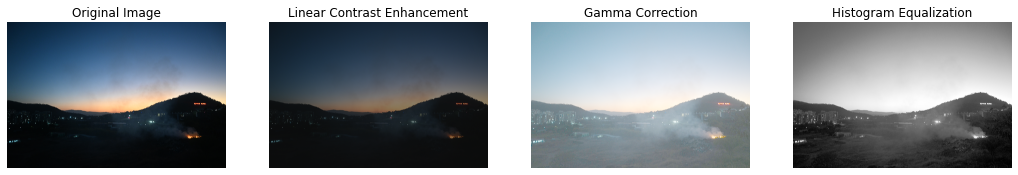

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def linear_contrast(image_rgb, alpha=0.5, beta=10):
    return cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)

def gamma_correction(image_rgb, gamma=0.2):
    gamma_correction = ((image_rgb / 255.0) ** gamma) * 255
    return np.clip(gamma_correction, 0, 255).astype(np.uint8)

def histogram_equalization(image_rgb):
    gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    equalized_image = cv2.equalizeHist(gray_image)
    return cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2RGB)

def enhance_and_display(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to RGB (OpenCV uses BGR by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply different point processing techniques for image enhancement
    enhanced_linear = linear_contrast(image_rgb)
    enhanced_gamma = gamma_correction(image_rgb)
    enhanced_hist_eq = histogram_equalization(image_rgb)

    # Display the original and enhanced images using matplotlib
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 4, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(enhanced_linear)
    plt.title('Linear Contrast Enhancement')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(enhanced_gamma)
    plt.title('Gamma Correction')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(enhanced_hist_eq)
    plt.title('Histogram Equalization')
    plt.axis('off')

    plt.show()

# Provide the path to the image on your local machine
image_path = r"C:\Users\Najeeb\Desktop\dslr\DSC_4295.JPG"

# Call the image enhancement function
enhance_and_display(image_path)


<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">
3. Image Enhancement using Mask Processing

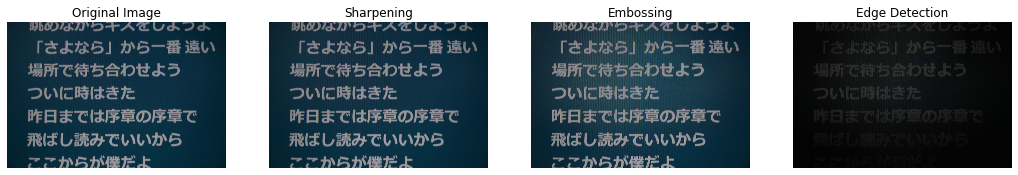

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def apply_mask(image_rgb, mask):
    # Apply the mask to the image
    enhanced_image = cv2.filter2D(image_rgb, -1, mask)
    return enhanced_image

def sharpen_mask(image_shape):
    return np.array([[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]])

def emboss_mask(image_shape):
    return np.array([[-2, -1, 0],
                     [-1, 1, 1],
                     [0, 1, 2]])

def edge_detection_mask(image_shape):
    return np.array([[-1, -1, -1],
                     [-1, 8, -1],
                     [-1, -1, -1]])

def enhance_image_with_masks(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to RGB (OpenCV uses BGR by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define different masks for image enhancement
    sharpen_mask_matrix = sharpen_mask(image_rgb.shape)
    emboss_mask_matrix = emboss_mask(image_rgb.shape)
    edge_detection_mask_matrix = edge_detection_mask(image_rgb.shape)

    # Apply the selected masks for image enhancement
    enhanced_sharpen = apply_mask(image_rgb, sharpen_mask_matrix)
    enhanced_emboss = apply_mask(image_rgb, emboss_mask_matrix)
    enhanced_edge_detection = apply_mask(image_rgb, edge_detection_mask_matrix)

    # Display the original and enhanced images using matplotlib
    plt.figure(figsize=(18, 8))

    plt.subplot(1, 4, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(enhanced_sharpen)
    plt.title('Sharpening')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(enhanced_emboss)
    plt.title('Embossing')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(enhanced_edge_detection, cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')

    plt.show()

# Provide the path to the image on your local machine
image_path = r"C:\Users\Najeeb\Desktop\dslr\DSC_4975.JPG"

# Call the image enhancement function
enhance_image_with_masks(image_path)


<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">
4. Image Segmentation using Slit and Merge

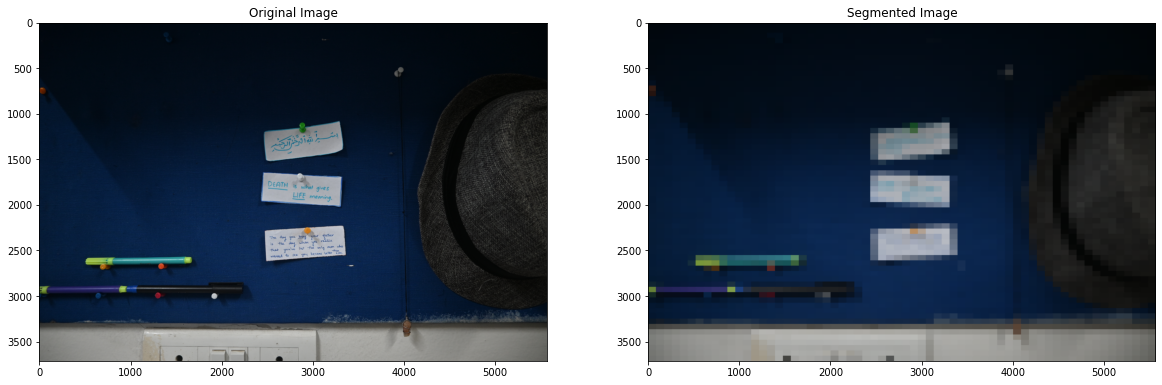

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for image segmentation using split and merging
def split_and_merge(image, min_size=100):
    # Get image dimensions
    rows, cols, _ = image.shape

    # Check if the image size is smaller than the specified min_size
    if rows < min_size or cols < min_size:
        return np.mean(image, axis=(0, 1))

    # Split the image into quadrants
    top_left = image[:rows//2, :cols//2, :]
    top_right = image[:rows//2, cols//2:, :]
    bottom_left = image[rows//2:, :cols//2, :]
    bottom_right = image[rows//2:, cols//2:, :]

    # Recursively split and merge each quadrant
    merged_image = np.zeros_like(image, dtype=np.uint8)
    merged_image[:rows//2, :cols//2, :] = split_and_merge(top_left, min_size)
    merged_image[:rows//2, cols//2:, :] = split_and_merge(top_right, min_size)
    merged_image[rows//2:, :cols//2, :] = split_and_merge(bottom_left, min_size)
    merged_image[rows//2:, cols//2:, :] = split_and_merge(bottom_right, min_size)

    return merged_image

# Load an image from your local system
image_path = r"C:\Users\Najeeb\Desktop\dslr\DSC_5036.JPG"  # Replace "path_to_your_image.jpg" with the actual path to your image
image_np = cv2.imread(image_path)

# Check if the image is loaded successfully
if image_np is None:
    print("Failed to load image.")
else:
    # Convert image to RGB color space
    image_rgb = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)

    # Perform split and merge segmentation
    segmented_image = split_and_merge(image_rgb)

    # Display the original and segmented images
    plt.figure(figsize=(20, 13))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title('Segmented Image')

    plt.show()


<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">
5. Image Segmentation using Region Growing

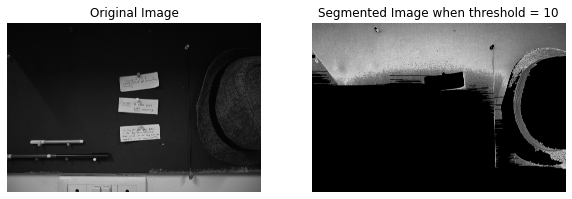

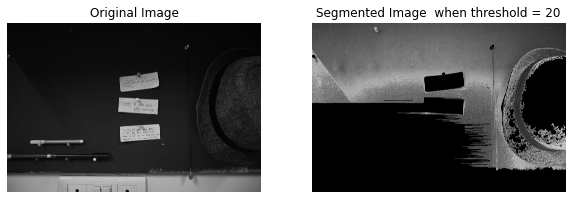

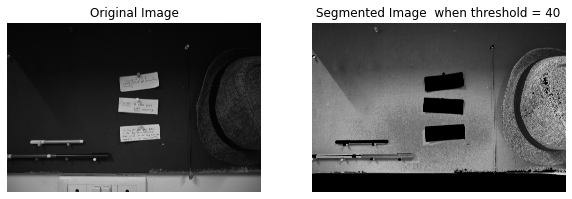

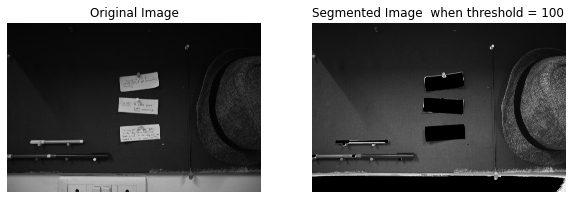

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(image, seed_point, threshold):
    """
    Apply region growing algorithm to segment an image.
    
    Parameters:
        - image: Input grayscale image.
        - seed_point: Seed point coordinates (x, y).
        - threshold: Threshold value for region growing.
        
    Returns:
        - segmented_image: Segmented image.
    """
    segmented_image = np.zeros_like(image, dtype=np.uint8)
    height, width = image.shape
    visited = np.zeros((height, width), dtype=bool)
    queue = []
    
    # Function to check if a pixel is inside the image boundaries
    def inside(x, y):
        return 0 <= x < height and 0 <= y < width
    
    # Function to check if a pixel is already visited
    def is_visited(x, y):
        return visited[x, y]
    
    # Function to check if a pixel's intensity is similar to the seed pixel
    def is_similar_intensity(x, y):
        return abs(int(image[x, y]) - int(image[seed_point])) <= threshold
    
    # Initialize the queue with the seed point
    queue.append(seed_point)
    visited[seed_point] = True
    
    # Region growing loop
    while queue:
        current_point = queue.pop(0)
        segmented_image[current_point] = image[current_point]
        
        # Check the 8 neighboring pixels
        for dx in range(-1, 2):
            for dy in range(-1, 2):
                if dx == 0 and dy == 0:
                    continue
                
                x, y = current_point[0] + dx, current_point[1] + dy
                
                if inside(x, y) and not is_visited(x, y) and is_similar_intensity(x, y):
                    queue.append((x, y))
                    visited[x, y] = True
    
    return segmented_image

# Read the input image
image = cv2.imread(r"C:\Users\Najeeb\Desktop\dslr\DSC_5036.JPG", cv2.IMREAD_GRAYSCALE)

# Define seed point (you can choose any point in the image)
seed_point = (100, 100)

# Set threshold value
threshold = 10

# Apply region growing
segmented_image = region_growing(image, seed_point, threshold)

# Display the original and segmented images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image when threshold = 10')
plt.axis('off')

# #####################################################################################

# Set threshold value
threshold = 20

# Apply region growing
segmented_image = region_growing(image, seed_point, threshold)

# Display the original and segmented images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image  when threshold = 20')
plt.axis('off')


# #####################################################################################

# Set threshold value
threshold = 40

# Apply region growing
segmented_image = region_growing(image, seed_point, threshold)

# Display the original and segmented images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image  when threshold = 40')
plt.axis('off')

# #####################################################################################

# Set threshold value
threshold = 100

# Apply region growing
segmented_image = region_growing(image, seed_point, threshold)

# Display the original and segmented images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image  when threshold = 100')
plt.axis('off')


plt.show()


<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">
6. Image Segmentation using Region Thresholding

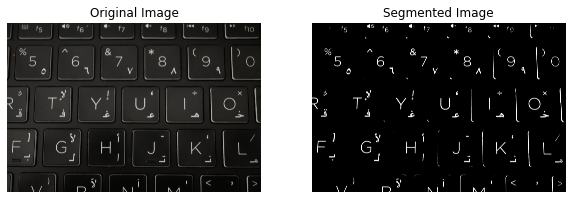

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_thresholding(image, threshold):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding
    _, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
    
    return binary_image

# Load the image
image_path = r"C:\Users\Najeeb\Desktop\dslr\DSC_4764.JPG" # Replace 'your_image_path.jpg' with the path to your image
original_image = cv2.imread(image_path)

# Set the threshold value
threshold_value = 127  # Adjust this threshold value as needed

# Apply region thresholding
segmented_image = region_thresholding(original_image, threshold_value)

# Display original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

plt.show()


<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid lightblue">
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid blue">
